# Curso i3a

## Inteligencia Artificial Aplicada al Arte


## Ejemplo para cargar datos

In [31]:
!wget https://gitlab.com/i3a/clases/raw/master/datasets/pokemon.csv

--2019-04-08 15:38:10--  https://gitlab.com/i3a/clases/raw/master/datasets/pokemon.csv
Resolving gitlab.com (gitlab.com)... 35.231.145.151
Connecting to gitlab.com (gitlab.com)|35.231.145.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44028 (43K) [text/plain]
Saving to: ‘pokemon.csv’

pokemon.csv         100%[===================>]  43,00K   261KB/s    in 0,2s    

2019-04-08 15:38:12 (261 KB/s) - ‘pokemon.csv’ saved [44028/44028]



In [33]:
import pandas as pd
dataframe_pokemons = pd.read_csv('pokemon.csv',index_col='#')
dataframe_pokemons

Name    Type 1  Type 2  Total   HP  Attack  Defense  \
#                                                                               
1                    Bulbasaur     Grass  Poison    318   45      49       49   
2                      Ivysaur     Grass  Poison    405   60      62       63   
3                     Venusaur     Grass  Poison    525   80      82       83   
3        VenusaurMega Venusaur     Grass  Poison    625   80     100      123   
4                   Charmander      Fire     NaN    309   39      52       43   
5                   Charmeleon      Fire     NaN    405   58      64       58   
6                    Charizard      Fire  Flying    534   78      84       78   
6    CharizardMega Charizard X      Fire  Dragon    634   78     130      111   
6    CharizardMega Charizard Y      Fire  Flying    634   78     104       78   
7                     Squirtle     Water     NaN    314   44      48       65   
8                    Wartortle     Water     NaN    405   59      63       80   
9                    Blastoise     Water     NaN    530   79      83      100   
9      BlastoiseMega Blastoise     Water     NaN    630   79     103      120   
10                    Caterpie       Bug     NaN    195   45      30       35   
11                     Metapod       Bug     NaN    205   50      20       55   
12                  Butterfree       Bug  Flying    395   60      45       50   
13                      Weedle       Bug  Poison    195   40      35       30   
14                      Kakuna       Bug  Poison    205   45      25       50   
15                    Beedrill       Bug  Poison    395   65      90       40   
15       BeedrillMega Beedrill       Bug  Poison    495   65     150       40   
16                      Pidgey    Normal  Flying    251   40      45       40   
17                   Pidgeotto    Normal  Flying    349   63      60       55   
18                     Pidgeot    Normal  Flying    479   83      80       75   
18         PidgeotMega Pidgeot    Normal  Flying    579   83      80       80   
19                     Rattata    Normal     NaN    253   30      56       35   
20                    Raticate    Normal     NaN    413   55      81       60   
21                     Spearow    Normal  Flying    262   40      60       30   
22                      Fearow    Normal  Flying    442   65      90       65   
23                       Ekans    Poison     NaN    288   35      60       44   
24                       Arbok    Poison     NaN    438   60      85       69   
..                         ...       ...     ...    ...  ...     ...      ...   
700                    Sylveon     Fairy     NaN    525   95      65       65   
701                   Hawlucha  Fighting  Flying    500   78      92       75   
702                    Dedenne  Electric   Fairy    431   67      58       57   
703                    Carbink      Rock   Fairy    500   50      50      150   
704                      Goomy    Dragon     NaN    300   45      50       35   
705                    Sliggoo    Dragon     NaN    452   68      75       53   
706                     Goodra    Dragon     NaN    600   90     100       70   
707                     Klefki     Steel   Fairy    470   57      80       91   
708                   Phantump     Ghost   Grass    309   43      70       48   
709                  Trevenant     Ghost   Grass    474   85     110       76   
710      PumpkabooAverage Size     Ghost   Grass    335   49      66       70   
710        PumpkabooSmall Size     Ghost   Grass    335   44      66       70   
710        PumpkabooLarge Size     Ghost   Grass    335   54      66       70   
710        PumpkabooSuper Size     Ghost   Grass    335   59      66       70   
711      GourgeistAverage Size     Ghost   Grass    494   65      90      122   
711        GourgeistSmall Size     Ghost   Grass    494   55      85      122   
711        GourgeistLarge Size     Ghost   Grass    494  

## Ejemplo gráfico interactivo con altair

In [25]:
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(dataframe_pokemons, height=600, width=800).mark_point().encode(
  x='Attack',
  y='Defense',
  color='Type 1',
  tooltip=['Name']
).interactive()

## Gráfico de cajas con seaborn

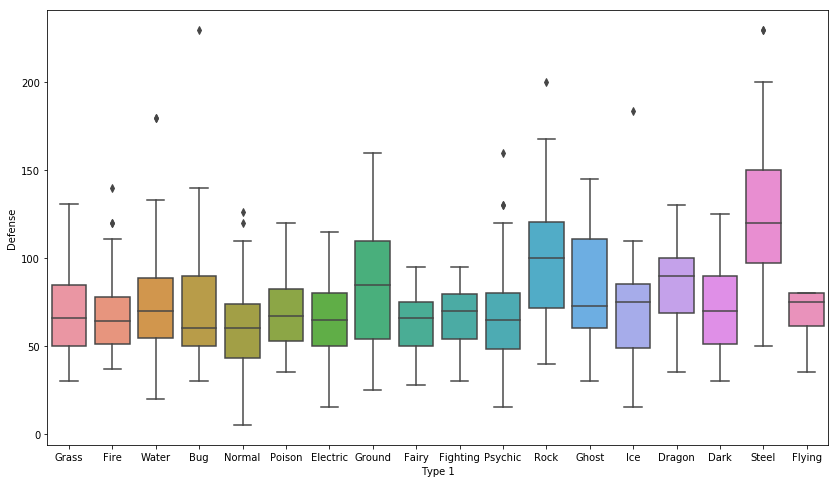

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
sns.boxplot(x="Type 1", y="Defense", data=dataframe_pokemons);

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
classifier = RandomForestClassifier(n_estimators=500,max_features=None)

X = dataframe_pokemons[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
y = dataframe_pokemons['Type 1']

# Separación en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Entrenamiento
classifier.fit(X_train,y_train);

# Evaluación
y_pred = classifier.predict(X_test);

In [28]:
recall = recall_score(y_test,y_pred,labels=classifier.classes_,average='micro')
chance = 1/len(classifier.classes_)
print('La performance del clasificador es', round(recall/chance,1), 'veces mejor que elegir al azar')

La performance del clasificador es 4.0 veces mejor que elegir al azar


In [29]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
df_cm = pd.DataFrame(cm, index=classifier.classes_, columns=classifier.classes_)
fig = plt.figure(figsize=(14,12))
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.ylabel('True label')
plt.xlabel('Predicted label');